In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import save_model

import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
tipos = 2
values = []

for i in range(0, tipos):
    with open("Datos entreno\\tipo_" + str(i) + ".txt", 'r') as f:
        next(f)  # Saltar la primera línea que contiene el encabezado
        for line in f:
            w, x, y, z, etiqueta = map(float, line.strip().split(','))
            dato = [w, x, y, z, etiqueta]
            values.append(dato)
print(len(values))

4000


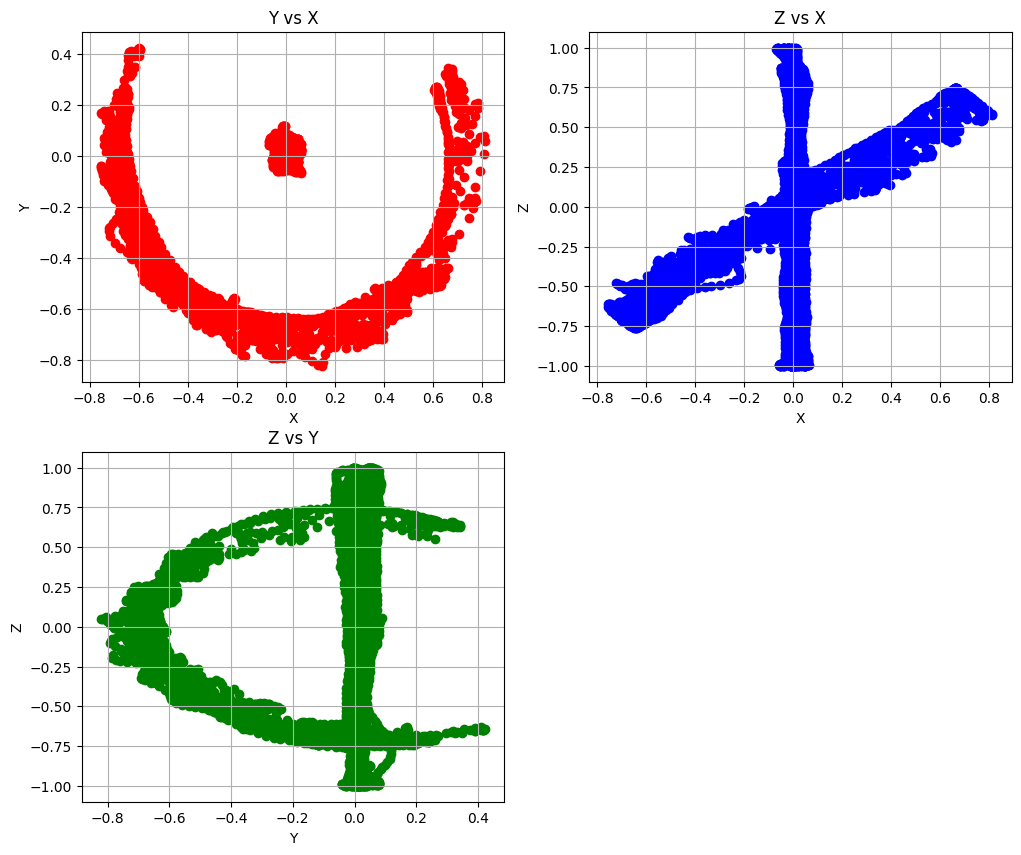

In [3]:
x, y, z = [], [], []
for v in values:
    x.append(v[1]), y.append(v[2]), z.append(v[3])

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1), plt.scatter(x, y, color='red'), plt.xlabel('X'), plt.ylabel('Y'), plt.title('Y vs X'), plt.grid(True)
plt.subplot(2, 2, 2), plt.scatter(x, z, color='blue'), plt.xlabel('X'), plt.ylabel('Z'), plt.title('Z vs X'), plt.grid(True)
plt.subplot(2, 2, 3), plt.scatter(y, z, color='green'), plt.xlabel('Y'), plt.ylabel('Z'), plt.title('Z vs Y'), plt.grid(True)
plt.show()

In [4]:
test_size = int(len(values) * 0.2)  # Calcula el tamaño del conjunto de prueba (20%)

# Mezcla aleatoriamente los índices de los datos de entrenamiento
indices = list(range(len(values)))
random.shuffle(indices)

test_indices = indices[:test_size]  # Selecciona los primeros test_size índices para el conjunto de prueba
train_indices = indices[test_size:] # Resto de los índices para el conjunto de entrenamiento

# Construye los conjuntos de entrenamiento y prueba
train, test = [], []
test = [values[i] for i in test_indices]
train = [values[i] for i in train_indices]

train_values, train_labels, test_values, test_labels = [], [], [], []

for valor in train:
    dato, etiqueta = valor[:4], valor[4:]
    train_values.append(dato)
    train_labels.append(etiqueta)

for valor in test:
    dato, etiqueta = valor[:4], valor[4:]
    test_values.append(dato)
    test_labels.append(etiqueta)

In [5]:
print(train_values[:1])
print(train_labels[:5])
print(train_labels[995:])
print(len(train_values))
print(len(test_values))

[[0.62585449, 0.37524414, -0.64788818, 0.21856689]]
[[1.0], [0.0], [0.0], [0.0], [0.0]]
[[1.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [1.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0], [0.0], [1.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [1.0], [1.0], [0.0], [1.0], [0.0], [0.0], [0.0], [1.0], [

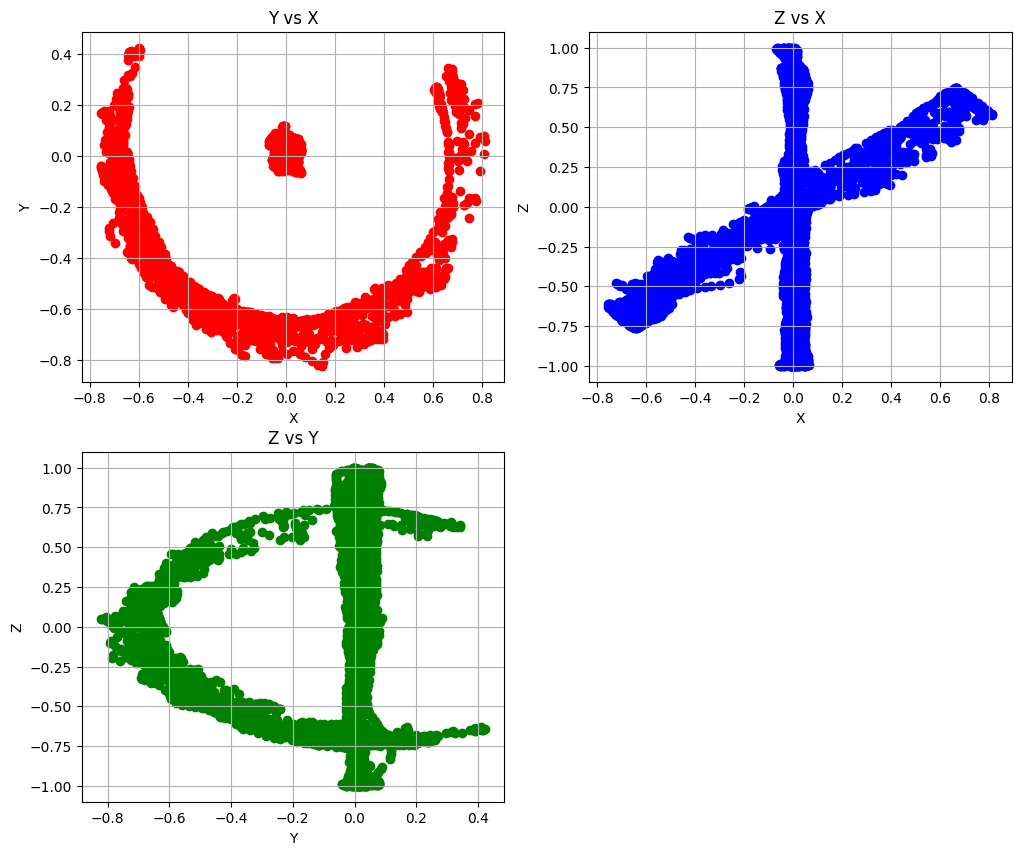

In [6]:
x, y, z = [], [], []
for v in train_values:
    x.append(v[1]), y.append(v[2]), z.append(v[3])

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1), plt.scatter(x, y, color='red'), plt.xlabel('X'), plt.ylabel('Y'), plt.title('Y vs X'), plt.grid(True)
plt.subplot(2, 2, 2), plt.scatter(x, z, color='blue'), plt.xlabel('X'), plt.ylabel('Z'), plt.title('Z vs X'), plt.grid(True)
plt.subplot(2, 2, 3), plt.scatter(y, z, color='green'), plt.xlabel('Y'), plt.ylabel('Z'), plt.title('Z vs Y'), plt.grid(True)
plt.show()

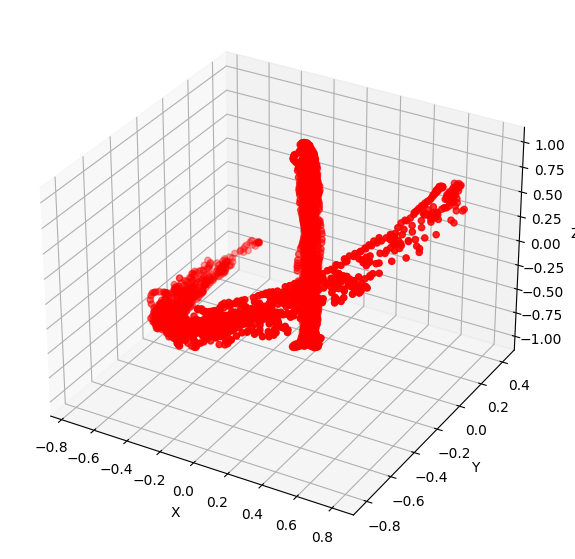

(<mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x184cf277280>,
 Text(-0.038187413771208434, -0.08267817607673551, 'X'),
 Text(0.0645790907466725, -0.06707669577331078, 'Y'),
 Text(0.09909285648437682, 0.013275925435340905, 'Z'),
 None)

In [302]:
x, y, z = [], [], []
for v in train_values:
    x.append(v[1]), y.append(v[2]), z.append(v[3])

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='r', marker='o'), ax.set_xlabel('X'), ax.set_ylabel('Y'), ax.set_zlabel('Z'), plt.show()

In [304]:
labels_one_hot = to_categorical(train_labels)   # Convertimos las etiquetas en one hot

# Convertimos los datos en tensores
inputs = tf.convert_to_tensor(train_values, dtype=tf.float32)
labels = tf.convert_to_tensor(labels_one_hot, dtype=tf.float32)

# Creamos el modelo
model = Sequential([
    Dense(2, input_shape=(4,), activation='softmax')
])

# Compilamos el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history = model.fit(inputs, labels, epochs=50, batch_size=10, verbose=0)

# Evaluamos el modelo
loss, accuracy = model.evaluate(inputs, labels_one_hot)
print(f'Loss: {loss}, Accuracy: {accuracy}')

100/100 [==============================] - 1s 2ms/step - loss: 0.2581 - accuracy: 0.8809
Loss: 0.25814372301101685, Accuracy: 0.8809375166893005


In [322]:
labels_one_hot = to_categorical(train_labels)   # Convertimos las etiquetas en one hot

# Convertimos los datos en tensores
inputs = tf.convert_to_tensor(train_values, dtype=tf.float32)
labels = tf.convert_to_tensor(labels_one_hot, dtype=tf.float32)

# Creamos el modelo
model = Sequential([
    Dense(2, input_shape=(4,), activation='sigmoid'),
    Dense(2, activation='softmax')
])

# Compilamos el modelo
optimizer = tf.keras.optimizers.Adam(learning_rate=0.3)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
history = model.fit(inputs, labels, epochs=50, batch_size=10, verbose=0)

# Evaluamos el modelo
loss, accuracy = model.evaluate(inputs, labels_one_hot)
print(f'Loss: {loss}, Accuracy: {accuracy}')

100/100 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9991
Loss: 0.014262751676142216, Accuracy: 0.9990624785423279


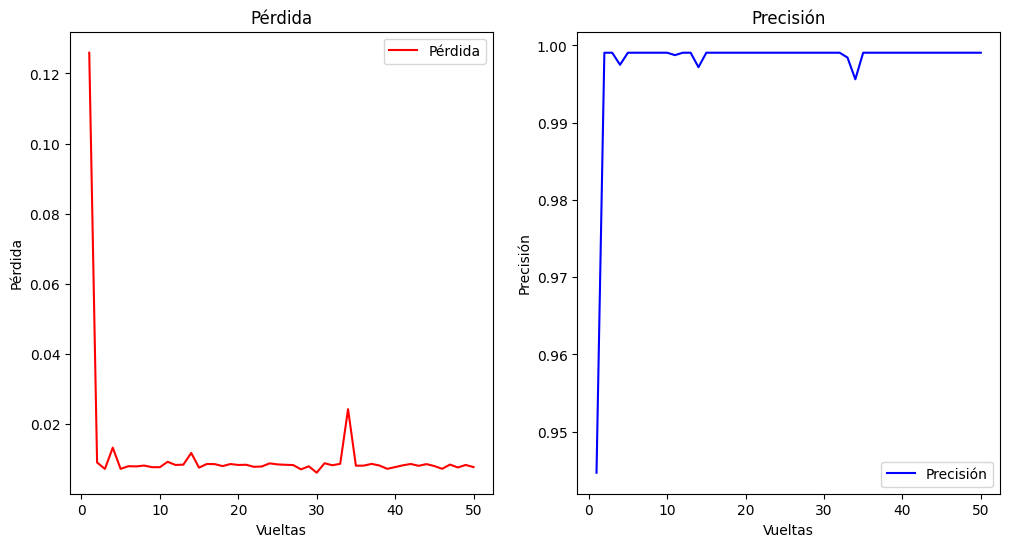

In [318]:
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

# Crear dos gráficos, uno para la pérdida y otro para la precisión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer gráfico
plt.plot(epochs, loss, 'r', label='Pérdida')
plt.title('Pérdida'), plt.xlabel('Vueltas'), plt.ylabel('Pérdida'), plt.legend()

plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo gráfico
plt.plot(epochs, accuracy, 'b', label='Precisión')
plt.title('Precisión'), plt.xlabel('Vueltas'), plt.ylabel('Precisión'), plt.legend()

plt.show()

In [319]:
# Hacer predicciones en el conjunto de datos de prueba
predictions = model.predict(test_values)

# Convertir las predicciones a clases
predicted_classes = [np.argmax(prediction) for prediction in predictions]

# Imprimir algunos ejemplos de valores reales y predichos del conjunto de prueba
print("Ejemplos del conjunto de prueba:")
# for i in range(50):  # Muestra los primeros 5 ejemplos
#     print(f"Valor Real: {test_labels[i]}, Etiqueta Predicha: {predicted_classes[i]}")


25/25 [==============================] - 0s 3ms/step
Ejemplos del conjunto de prueba:


In [320]:
# Contadores para las predicciones correctas e incorrectas
correct_predictions = 0
incorrect_predictions = 0

# Comparar las etiquetas reales con las etiquetas predichas
for i in range(len(test_labels)):
    if test_labels[i] == predicted_classes[i]:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

# Imprimir el recuento de predicciones correctas e incorrectas
print(f"Predicciones Correctas: {correct_predictions}")
print(f"Predicciones Incorrectas: {incorrect_predictions}")


total_predictions = len(test_labels)
accuracy = (correct_predictions / total_predictions) * 100
error_rate = (incorrect_predictions / total_predictions) * 100


# Imprimir el porcentaje de aciertos y errores
print(f"Porcentaje de Aciertos: {accuracy:.2f}%")
print(f"Porcentaje de Errores: {error_rate:.2f}%")

Predicciones Correctas: 797
Predicciones Incorrectas: 3
Porcentaje de Aciertos: 99.62%
Porcentaje de Errores: 0.38%


In [312]:
# Ruta donde se guardará el modelo
ruta_modelo = "modelo_3_precision_99,906_porc_sigmoid_2_neuronas_intermedia.h5"

# Guardar el modelo
model.save(ruta_modelo)

print("Modelo guardado correctamente.")

Modelo guardado correctamente.
